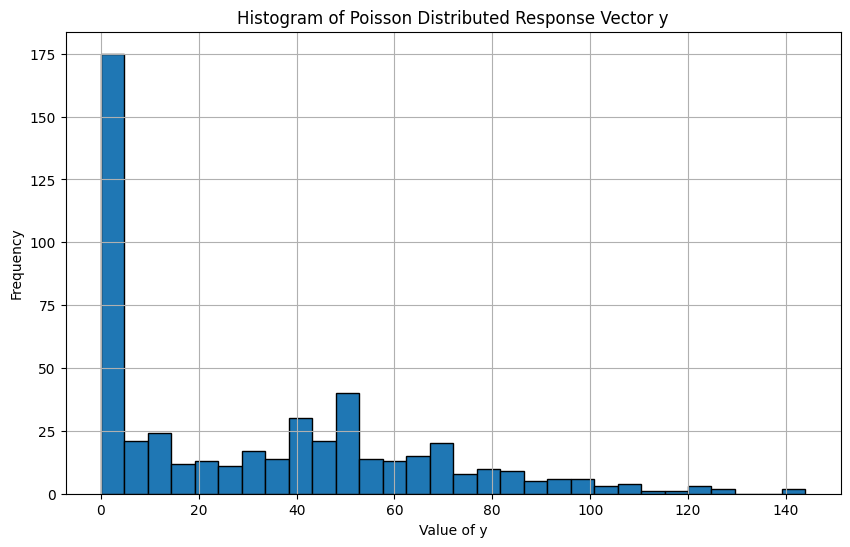

In [17]:
import numpy
import numpy as np
import matplotlib.pyplot as plt

def generate_controlled_sparse_poisson_dataset(n, p, q=0.6, sparsity=0.2, signal_strength=5):
    # Step 1: Draw a random variable from Bernoulli distribution
    bernoulli_variable = np.random.binomial(1, q, 1)[0]
    
    # Step 2: Generate sparse design matrix X
    X = np.random.binomial(1, sparsity, (n, p))
    
    # Step 3: Randomly select 5 columns in the design matrix
    selected_columns = np.random.choice(p, 5, replace=False)
    selected_features = X[:, selected_columns]
    
    # Step 4: Select 5 features out of their 2^5 combinations
    feature_combinations = np.random.choice(range(2**5), 5, replace=False)
    
    # Step 5: Draw true coefficients w from uniform distribution U[0, 1] and increase signal strength
    w = np.random.uniform(0, 1, 5) * signal_strength

    
    # Step 6: Build response vector y
    y = np.dot(selected_features, w)
    
    # Step 7: Generate Poisson distributed dataset
    y_poisson = np.random.poisson(y)
    
    return X, y_poisson

# Generate the controlled sparse Poisson dataset
n = 500  # Number of samples
p = 20   # Number of features
sparsity = 0.2  # Sparsity level
signal_strength = 50 # Increase signal strength
X, y_poisson = generate_controlled_sparse_poisson_dataset(n, p, sparsity=sparsity, signal_strength=signal_strength)

# Plot the histogram of y_poisson
plt.figure(figsize=(10, 6))
plt.hist(y_poisson, bins=30, edgecolor='black')
plt.title('Histogram of Poisson Distributed Response Vector y')
plt.xlabel('Value of y')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()



In [18]:
import pandas as pd

data = np.hstack((X, y_poisson.reshape(-1, 1)))
columns = [f'Feature_{i+1}' for i in range(p)] + ['Response']
df = pd.DataFrame(data, columns=columns)

# Save the DataFrame to a CSV file
file_path = r'C:\Users\Admin\PycharmProjects\pythonProject1\dataset.csv'
df.to_csv(file_path, index=False)


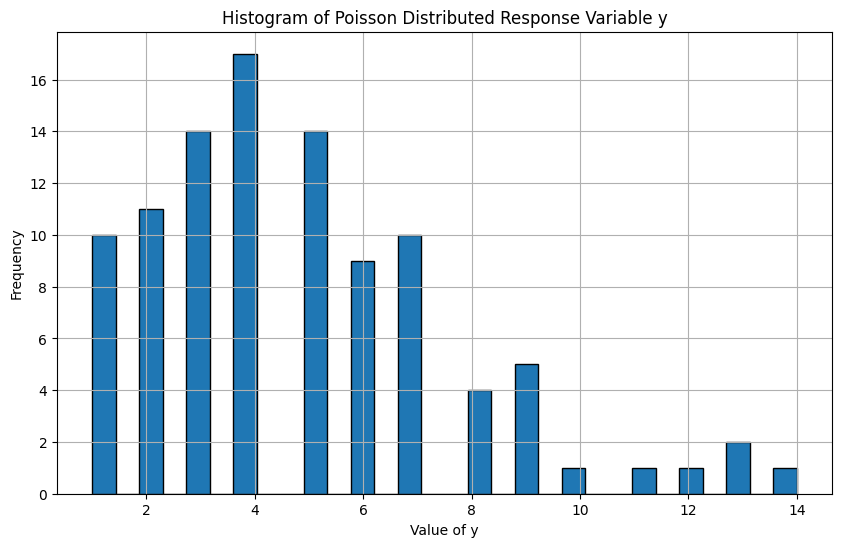

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# 生成符合泊松回归模型的数据
np.random.seed(42)
n_samples = 100
n_features = 5

# 随机生成特征矩阵 X
X = np.random.rand(n_samples, n_features)

# 随机生成回归系数 beta
beta = np.random.rand(n_features)

# 计算对数期望值
log_mu = X @ beta

# 计算期望值
mu = np.exp(log_mu)

# 生成符合泊松分布的响应变量 y
y = np.random.poisson(mu)

# 绘制 y 的柱状图
plt.figure(figsize=(10, 6))
plt.hist(y, bins=30, edgecolor='black')
plt.title('Histogram of Poisson Distributed Response Variable y')
plt.xlabel('Value of y')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()



In [24]:
import pandas as pd

data = np.hstack((X, y_poisson.reshape(-1, 1)))
columns = [f'Feature_{i+1}' for i in range(p)] + ['Response']
df = pd.DataFrame(data, columns=columns)

# Save the DataFrame to a CSV file
file_path = r'C:\Users\Admin\PycharmProjects\pythonProject1\dataset.csv'
df.to_csv(file_path, index=False)


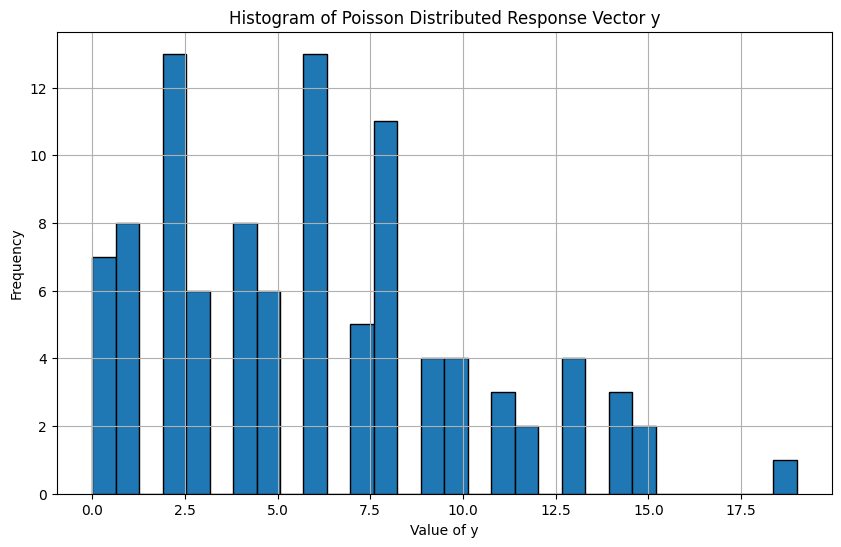

In [28]:
import numpy as np
import matplotlib.pyplot as plt

def generate_informative_sparse_poisson_dataset(n, p, sparsity=0.2, signal_strength=5, min_non_zero_y=10):
    while True:
        # Step 1: Generate sparse design matrix X with controlled sparsity
        X = np.random.binomial(1, sparsity, (n, p))
        
        # Step 2: Randomly select 5 columns in the design matrix
        selected_columns = np.random.choice(p, 5, replace=False)
        selected_features = X[:, selected_columns]
        
        # Step 3: Draw true coefficients w from uniform distribution U[0, 1] and increase signal strength
        w = np.random.uniform(0, 1, 5) * signal_strength
        
        # Step 4: Build linear combination of selected features
        linear_combination = np.dot(selected_features, w)
        
        # Step 5: Ensure non-negative linear combination for Poisson distribution
        linear_combination = np.maximum(linear_combination, 0)
        
        # Step 6: Generate Poisson distributed dataset
        y_poisson = np.random.poisson(linear_combination)
        
        # Check if the number of non-zero values in y_poisson is above the threshold
        if np.count_nonzero(y_poisson) >= min_non_zero_y:
            break
    
    return X, y_poisson

# Generate the informative sparse Poisson dataset
n = 100  # Number of samples
p = 20   # Number of features
sparsity = 0.5  # Sparsity level, increased to ensure more information in X
signal_strength = 5  # Increase signal strength
min_non_zero_y = 50  # Minimum number of non-zero values in y, increased for more informative y
X, y_poisson = generate_informative_sparse_poisson_dataset(n, p, sparsity=sparsity, signal_strength=signal_strength, min_non_zero_y=min_non_zero_y)

# Plot the histogram of y_poisson
plt.figure(figsize=(10, 6))
plt.hist(y_poisson, bins=30, edgecolor='black')
plt.title('Histogram of Poisson Distributed Response Vector y')
plt.xlabel('Value of y')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()



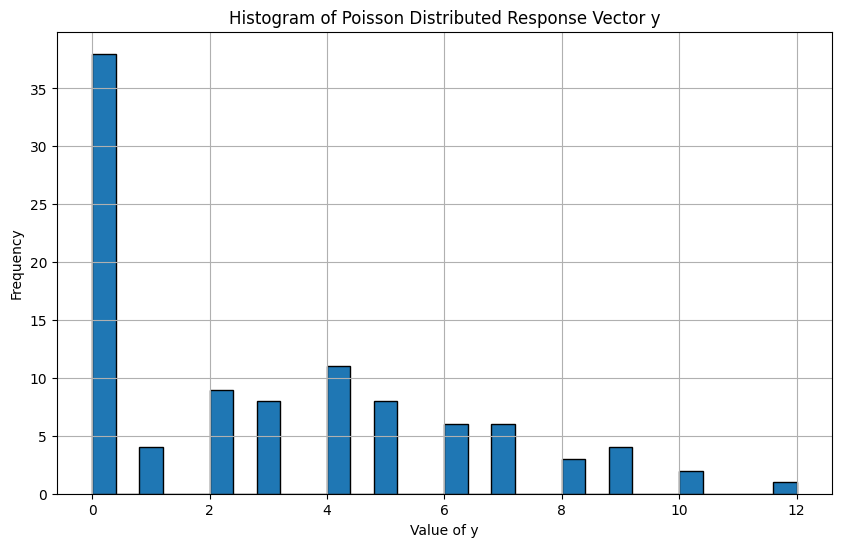

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def generate_controlled_sparse_poisson_dataset(n, p, q=0.6, sparsity=0.2, signal_strength=5, min_non_zero_y=10):
    while True:
        # Step 1: Draw a random variable from Bernoulli distribution
        bernoulli_variable = np.random.binomial(1, q, 1)[0]
        
        # Step 2: Generate sparse design matrix X
        X = np.random.binomial(1, sparsity, (n, p))
        
        # Step 3: Randomly select 5 columns in the design matrix
        selected_columns = np.random.choice(p, 5, replace=False)
        selected_features = X[:, selected_columns]
        
        # Step 4: Select 5 features out of their 2^5 combinations
        feature_combinations = np.random.choice(range(2**5), 5, replace=False)
        
        # Step 5: Draw true coefficients w from uniform distribution U[0, 1] and increase signal strength
        w = np.random.uniform(0, 1, 5) * signal_strength
        
        # Step 6: Build linear combination of selected features
        linear_combination = np.dot(selected_features, w)
        
        # Step 7: Ensure non-negative linear combination for Poisson distribution
        linear_combination = np.maximum(linear_combination, 0)
        
        # Step 8: Generate Poisson distributed dataset
        y_poisson = np.random.poisson(linear_combination)
        
        # Check if the number of non-zero values in y_poisson is above the threshold
        if np.count_nonzero(y_poisson) >= min_non_zero_y:
            break
    
    return X, y_poisson

# Generate the controlled sparse Poisson dataset
n = 100  # Number of samples
p = 20   # Number of features
sparsity = 0.2  # Sparsity level
signal_strength = 5  # Increase signal strength
min_non_zero_y = 10  # Minimum number of non-zero values in y
X, y_poisson = generate_controlled_sparse_poisson_dataset(n, p, sparsity=sparsity, signal_strength=signal_strength, min_non_zero_y=min_non_zero_y)

# Plot the histogram of y_poisson
plt.figure(figsize=(10, 6))
plt.hist(y_poisson, bins=30, edgecolor='black')
plt.title('Histogram of Poisson Distributed Response Vector y')
plt.xlabel('Value of y')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [1]:
import numpy as np
core_itemset=np.array([np.array([3,14,33]),np.array([2,22,28,37]),np.array([7,35]),np.array([10,25,29,31,20])],dtype=object)
core_coefficent=np.random.randint(1,8,len(core_itemset))
core_itemset_dict = {
    "set1": core_itemset[0],
    "set2": core_itemset[1],
    "set3": core_itemset[2],
    "set4": core_itemset[3]
}

print(core_coefficent)

[4 6 6 6]


In [2]:
import itertools
num_rows = 500  # 示例行数，可以根据需要调整
num_cols = 40  # 示例列数，可以根据需要调整

# 创建一个全零的矩阵
sparse_matrix = np.zeros((num_rows, num_cols), dtype=int)

# 生成所有可能的子集
all_keys = list(core_itemset_dict.keys())
all_subsets = []
for r in range(1, len(all_keys) + 1):
    subsets = list(itertools.combinations(all_keys, r))
    all_subsets.extend(subsets)

# 存储每行选择的子集
chosen_subsets_per_row = []

# 为每行随机分配一个子集，并设置相应列为1
for i in range(num_rows):
    chosen_subset_index = np.random.randint(0, len(all_subsets))
    chosen_subset = all_subsets[chosen_subset_index]
    chosen_subsets_per_row.append(chosen_subset)
    print(f"Row {i} chosen subset: {chosen_subset}")
    # 展示选择的列
    chosen_columns = []
    for key in chosen_subset:
        for element in core_itemset_dict[key]:
            # 将列索引减1以适应从1开始的索引
            sparse_matrix[i, element - 1] = 1
            chosen_columns.append(element - 1)
    print(f"Row {i} columns set to 1: {sorted([x + 1 for x in chosen_columns])}")

# 随机填充一些其他的 1，使矩阵保持稀疏性
sparsity = 0.1  # 定义稀疏度，比如 10%
num_elements_to_fill = int(sparsity * num_rows * num_cols)

while num_elements_to_fill > 0:
    row = np.random.randint(0, num_rows)
    col = np.random.randint(0, num_cols)
    # 确保不会覆盖已设置的1
    if sparse_matrix[row, col] == 0:
        sparse_matrix[row, col] = 1
        num_elements_to_fill -= 1

print("\nSparse Matrix:")
print(sparse_matrix)

# 检查每行是否包含选择的子集中的所有元素
def check_matrix(matrix, chosen_subsets, core_itemset_dict):
    for i, subset in enumerate(chosen_subsets):
        for key in subset:
            for element in core_itemset_dict[key]:
                # 将列索引加1以适应从1开始的索引
                if matrix[i, element - 1] != 1:
                    print(f"Error in row {i}: element {element} from subset {key} is not set to 1")
                    return False
    return True

# 运行检查
if check_matrix(sparse_matrix, chosen_subsets_per_row, core_itemset_dict):
    print("\nAll chosen subsets are correctly represented in the matrix.")
else:
    print("\nThere was an error in the matrix representation.")

Row 0 chosen subset: ('set2', 'set4')
Row 0 columns set to 1: [np.int64(2), np.int64(10), np.int64(20), np.int64(22), np.int64(25), np.int64(28), np.int64(29), np.int64(31), np.int64(37)]
Row 1 chosen subset: ('set2', 'set3', 'set4')
Row 1 columns set to 1: [np.int64(2), np.int64(7), np.int64(10), np.int64(20), np.int64(22), np.int64(25), np.int64(28), np.int64(29), np.int64(31), np.int64(35), np.int64(37)]
Row 2 chosen subset: ('set2', 'set3', 'set4')
Row 2 columns set to 1: [np.int64(2), np.int64(7), np.int64(10), np.int64(20), np.int64(22), np.int64(25), np.int64(28), np.int64(29), np.int64(31), np.int64(35), np.int64(37)]
Row 3 chosen subset: ('set1', 'set2')
Row 3 columns set to 1: [np.int64(2), np.int64(3), np.int64(14), np.int64(22), np.int64(28), np.int64(33), np.int64(37)]
Row 4 chosen subset: ('set1', 'set2')
Row 4 columns set to 1: [np.int64(2), np.int64(3), np.int64(14), np.int64(22), np.int64(28), np.int64(33), np.int64(37)]
Row 5 chosen subset: ('set1', 'set2')
Row 5 colu

In [3]:
lambda_vector = np.zeros(num_rows)
for i, subset in enumerate(chosen_subsets_per_row):
    for key in subset:
        key_index = all_keys.index(key)
        lambda_vector[i] += core_coefficent[key_index]

y = np.random.poisson(lambda_vector)

print("\nGenerated y vector:")
print(y)


Generated y vector:
[11 13 22 14  8  9  3 15  6 20 12 20  6 10  5  6 16 16 27 21 15  9  4 10
  7  7  9  6 13 16  5  6 12 18 18 10  6  4 21 12  6 10 14  7  7 10 20 20
  6 11  6 14  9 19 11 19 19  5 18 17 11 22 10 11 10  7  1 14 10  6 13  2
 10 12 17  4 22 18 14 20  3 18  7 15  9 24  5 13  6  3  1  4 17  6  6 14
 12 13 30 21  4 15 17 10 13  4 16  2 19 13 10 10 10 12 18  5 25 15  3 13
  9  7 14  2 11 20 14  7 11  9  6  8  9 18 15  5 12  4  9 14  8 11  3 11
  3 10 19  4 11  9 14  9 17 16 16 15 14  4 10 24  4  4  1 20  6  4  8  5
 14 15 18 16 14  5 10 22 16  9  9 11  3  4 19 17 14 17  6  5  4 16 11  5
  7 11 17  6 14  7  5 10  7  3 25  9  9  4 12 24 10 20 12  4  0  3  8 13
 14  4  7 14  7  9 23 26 12 11 19 11 12 11 11  6 17 10 11  3 11  8 23 12
  8 18  5  5 15  3  8  9 18  4  6 14 22 12 10 11 19 13  6 21  8 15 12  7
  3 10 14 11 18  9  4 21 23 11  8  3 20  8 13 11 11  5 13  9  5  3 28 16
 19  9  7 14 18  4  9 17  7  5 19 11 11 15 15 15  5  7 27 12  8 14  5  6
  6 10 18 11 11 15  3 14  3 32

In [33]:
# 将稀疏矩阵和 y 向量写入 CSV 文件
import pandas as pd
df = pd.DataFrame(sparse_matrix)
df['y'] = y
df.to_csv('sparse_matrix_with_y.csv', index=False)

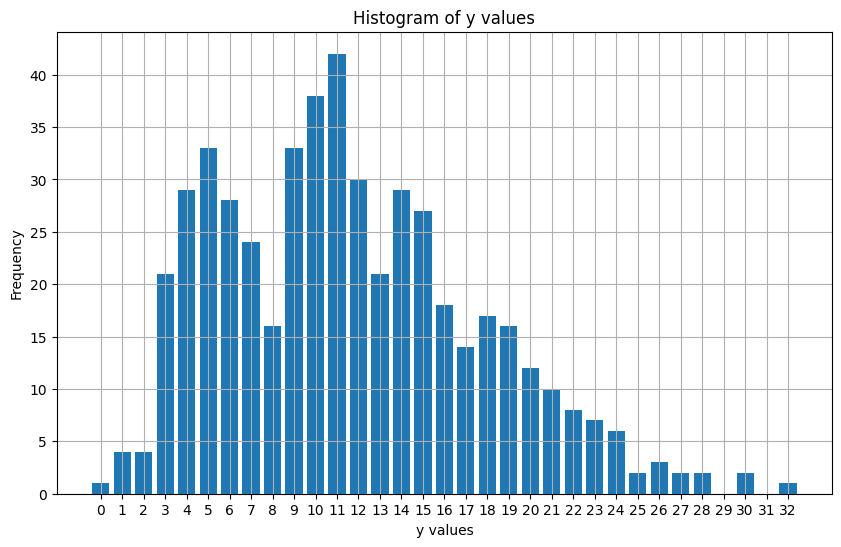

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(y, bins=range(int(y.min()), int(y.max()) + 2), align='left', rwidth=0.8)
plt.xlabel('y values')
plt.ylabel('Frequency')
plt.title('Histogram of y values')
plt.grid(True)

# 确保 x 轴是整数
plt.xticks(np.arange(y.min(), y.max() + 1, 1))

# 确保 y 轴是整数
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.show()

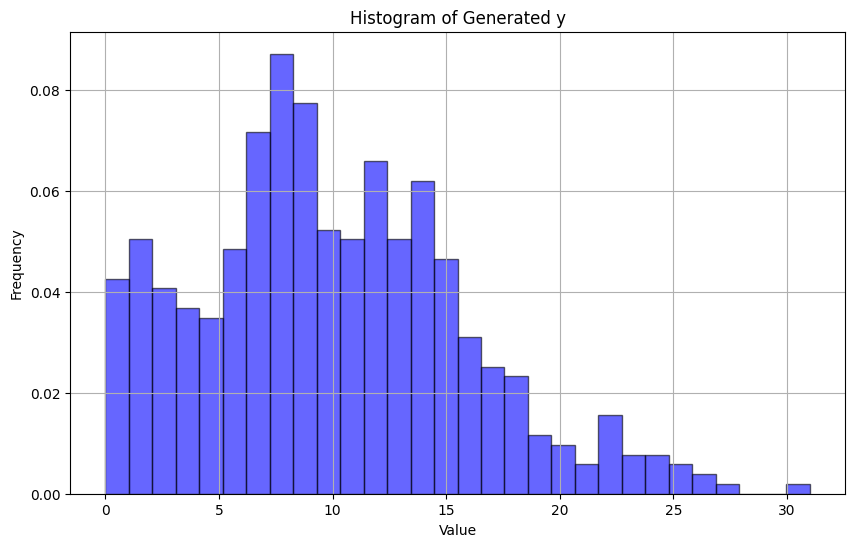

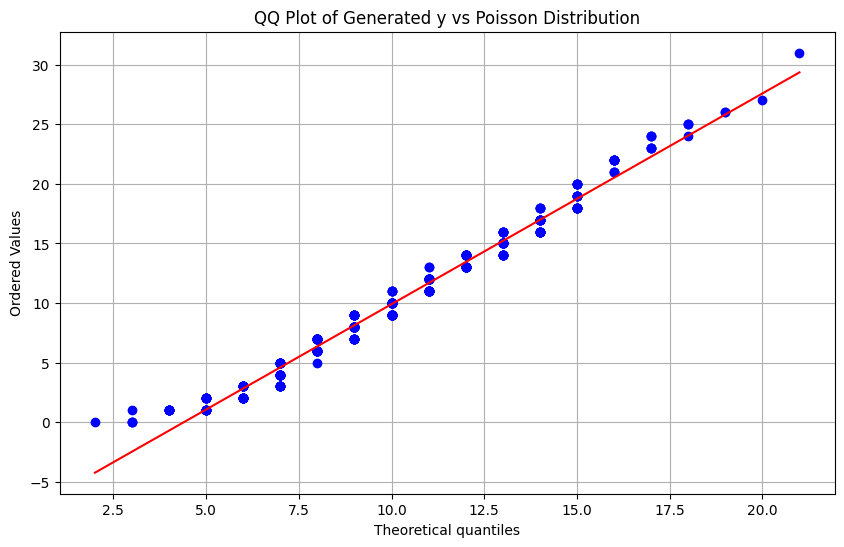

Chi-squared test statistic: 33986.14512460536
p-value: 0.0
The generated y does not follow a Poisson distribution (reject H0).


In [8]:
import matplotlib.pyplot as plt

# 绘制 y 的直方图
plt.figure(figsize=(10, 6))
plt.hist(y, bins=30, density=True, alpha=0.6, color='b', edgecolor='black')
plt.title('Histogram of Generated y')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
import scipy.stats as stats

# 绘制QQ图
plt.figure(figsize=(10, 6))
stats.probplot(y, dist="poisson", sparams=(np.mean(y),), plot=plt)
plt.title('QQ Plot of Generated y vs Poisson Distribution')
plt.grid(True)
plt.show()
from scipy.stats import chisquare

# 计算泊松分布的理论频率
observed_freq = np.bincount(y)
expected_freq = [len(y) * stats.poisson.pmf(i, np.mean(y)) for i in range(len(observed_freq))]

# 确保 expected_freq 和 observed_freq 的长度一致
max_length = max(len(observed_freq), len(expected_freq))
observed_freq = np.pad(observed_freq, (0, max_length - len(observed_freq)), 'constant')
expected_freq = np.pad(expected_freq, (0, max_length - len(expected_freq)), 'constant')

# 调整预期频率的总和以匹配观察频率的总和
expected_freq = expected_freq * (np.sum(observed_freq) / np.sum(expected_freq))

# 进行卡方检验
chi2_stat, p_val = chisquare(observed_freq, f_exp=expected_freq)

print(f"Chi-squared test statistic: {chi2_stat}")
print(f"p-value: {p_val}")

if p_val > 0.05:
    print("The generated y follows a Poisson distribution (fail to reject H0).")
else:
    print("The generated y does not follow a Poisson distribution (reject H0).")

Core coefficients: [7 7 3 1]
Row 0 chosen subset: ('set3', 'set4')
Row 0 columns set to 1: [np.int64(7), np.int64(10), np.int64(20), np.int64(25), np.int64(29), np.int64(31), np.int64(35)]
Row 1 chosen subset: ('set3',)
Row 1 columns set to 1: [np.int64(7), np.int64(35)]
Row 2 chosen subset: ('set1',)
Row 2 columns set to 1: [np.int64(3), np.int64(14), np.int64(33)]
Row 3 chosen subset: ('set2', 'set3')
Row 3 columns set to 1: [np.int64(2), np.int64(7), np.int64(22), np.int64(28), np.int64(35), np.int64(37)]
Row 4 chosen subset: ('set4',)
Row 4 columns set to 1: [np.int64(10), np.int64(20), np.int64(25), np.int64(29), np.int64(31)]
Row 5 chosen subset: ('set2', 'set3', 'set4')
Row 5 columns set to 1: [np.int64(2), np.int64(7), np.int64(10), np.int64(20), np.int64(22), np.int64(25), np.int64(28), np.int64(29), np.int64(31), np.int64(35), np.int64(37)]
Row 6 chosen subset: ('set2', 'set4')
Row 6 columns set to 1: [np.int64(2), np.int64(10), np.int64(20), np.int64(22), np.int64(25), np.in

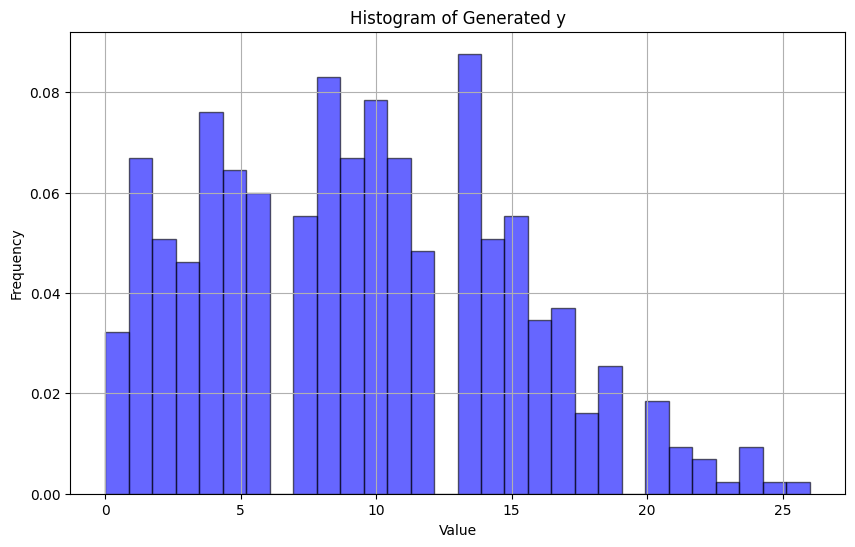

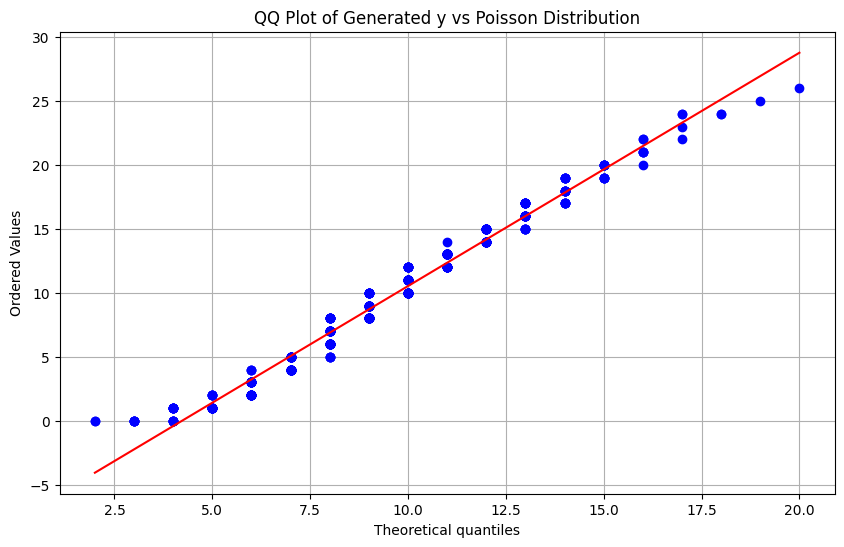

Chi-squared test statistic: 9210.125427513674
p-value: 0.0
The generated y does not follow a Poisson distribution (reject H0).


In [9]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import chisquare

# 定义核心集合和系数
core_itemset = np.array([np.array([3, 14, 33]), np.array([2, 22, 28, 37]), np.array([7, 35]), np.array([10, 25, 29, 31, 20])], dtype=object)
core_coefficent = np.random.randint(1, 8, len(core_itemset))
core_itemset_dict = {
    "set1": core_itemset[0],
    "set2": core_itemset[1],
    "set3": core_itemset[2],
    "set4": core_itemset[3]
}

print("Core coefficients:", core_coefficent)

# 创建稀疏矩阵
num_rows = 500  # 示例行数
num_cols = 40  # 示例列数
sparse_matrix = np.zeros((num_rows, num_cols), dtype=int)

# 生成所有可能的子集
all_keys = list(core_itemset_dict.keys())
all_subsets = [subset for r in range(1, len(all_keys) + 1) for subset in itertools.combinations(all_keys, r)]

# 为每行随机分配一个子集，并设置相应列为1
chosen_subsets_per_row = []
for i in range(num_rows):
    chosen_subset = all_subsets[np.random.randint(0, len(all_subsets))]
    chosen_subsets_per_row.append(chosen_subset)
    chosen_columns = []
    for key in chosen_subset:
        for element in core_itemset_dict[key]:
            sparse_matrix[i, element - 1] = 1
            chosen_columns.append(element - 1)
    print(f"Row {i} chosen subset: {chosen_subset}")
    print(f"Row {i} columns set to 1: {sorted([x + 1 for x in chosen_columns])}")

# 随机填充一些其他的1，使矩阵保持稀疏性
sparsity = 0.1  # 定义稀疏度，比如 10%
num_elements_to_fill = int(sparsity * num_rows * num_cols)
while num_elements_to_fill > 0:
    row, col = np.random.randint(0, num_rows), np.random.randint(0, num_cols)
    if sparse_matrix[row, col] == 0:
        sparse_matrix[row, col] = 1
        num_elements_to_fill -= 1

print("\nSparse Matrix:")
print(sparse_matrix)

# 检查每行是否包含选择的子集中的所有元素
def check_matrix(matrix, chosen_subsets, core_itemset_dict):
    for i, subset in enumerate(chosen_subsets):
        for key in subset:
            for element in core_itemset_dict[key]:
                if matrix[i, element - 1] != 1:
                    print(f"Error in row {i}: element {element} from subset {key} is not set to 1")
                    return False
    return True

if check_matrix(sparse_matrix, chosen_subsets_per_row, core_itemset_dict):
    print("\nAll chosen subsets are correctly represented in the matrix.")
else:
    print("\nThere was an error in the matrix representation.")

# 生成泊松分布的响应变量 y
lambda_vector = np.zeros(num_rows)
for i, subset in enumerate(chosen_subsets_per_row):
    for key in subset:
        key_index = all_keys.index(key)
        lambda_vector[i] += core_coefficent[key_index]

# 确保 lambda_vector 的最小值不为零
lambda_vector = np.maximum(lambda_vector, 1)

y = np.random.poisson(lambda_vector)

print("\nGenerated y vector:")
print(y)

# 检查 lambda_vector 的统计信息
print("\nLambda vector statistics:")
print(f"Mean: {np.mean(lambda_vector)}, Std Dev: {np.std(lambda_vector)}, Min: {np.min(lambda_vector)}, Max: {np.max(lambda_vector)}")

# 检查 y 的统计信息
print("\nGenerated y vector statistics:")
print(f"Mean: {np.mean(y)}, Std Dev: {np.std(y)}, Min: {np.min(y)}, Max: {np.max(y)}")
plt.figure(figsize=(10, 6))
plt.hist(y, bins=30, density=True, alpha=0.6, color='b', edgecolor='black')
plt.title('Histogram of Generated y')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# 2. 绘制QQ图
plt.figure(figsize=(10, 6))
stats.probplot(y, dist="poisson", sparams=(np.mean(y),), plot=plt)
plt.title('QQ Plot of Generated y vs Poisson Distribution')
plt.grid(True)
plt.show()

# 3. 卡方检验
# 确保观察频率和预期频率的总和相等
observed_freq = np.bincount(y)
expected_freq = [len(y) * stats.poisson.pmf(i, np.mean(y)) for i in range(len(observed_freq))]

# 确保 expected_freq 和 observed_freq 的长度一致
max_length = max(len(observed_freq), len(expected_freq))
observed_freq = np.pad(observed_freq, (0, max_length - len(observed_freq)), 'constant')
expected_freq = np.pad(expected_freq, (0, max_length - len(expected_freq)), 'constant')

# 调整预期频率的总和以匹配观察频率的总和
expected_freq = expected_freq * (np.sum(observed_freq) / np.sum(expected_freq))

# 进行卡方检验
chi2_stat, p_val = chisquare(observed_freq, f_exp=expected_freq)

print(f"Chi-squared test statistic: {chi2_stat}")
print(f"p-value: {p_val}")

if p_val > 0.05:
    print("The generated y follows a Poisson distribution (fail to reject H0).")
else:
    print("The generated y does not follow a Poisson distribution (reject H0).")

Core coefficients: [3 6 3 1]

Sparse Matrix:
[[0 1 1 ... 0 0 0]
 [0 1 1 ... 0 0 0]
 [1 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 1 1 ... 0 0 0]
 [0 1 0 ... 0 0 0]]

All chosen subsets are correctly represented in the matrix.

Generated y vector:
[ 6  8  6  3  2  4  4 11  0  8  2  5  1 11  3  7  2  3  3  9 15  4  6  6
 10  6 10  4  3  8 12  4  2  5  1  0  3  4  2 11  4  9  5  1  6 11  3  8
  4  3  7  0  2 10  1  2 10  3  3  9  2  8  4  4  4  6  7  7  0  9  3  9
  5  1  3  3  5  9  5 11  8  5 12  7  4  0  6  1  8  2  4  1 14  0  9  8
  6  6  6  7  5 15  4  2  4  1  1  3 10  5  7  3  3  8  6  3  9  1  9  3
  2  2  3  3  7  6  1  4  4 10  5  2  3 12 11  0  9  6 12  9  8  0  7  9
  1  1  7  4 12  1  1 14  5  2  2  1  8  2 10  7  7  2  0  8  8  3  1  4
 11  3  4  5  6  3  2  6  8  4  4  0  4  3  4  3  7  2  3  8  6  0  7  8
 13  4  9  9  2  2  3  3  9  5  1  4  7  4  4  1  6 12 14  2  5  3  0  1
 10  7  5  5  6  2  1  4  2  1  6  4  9  5  3  2  6  7  2  0  0 11 12  3
  8  1  2  6  5  5  3  

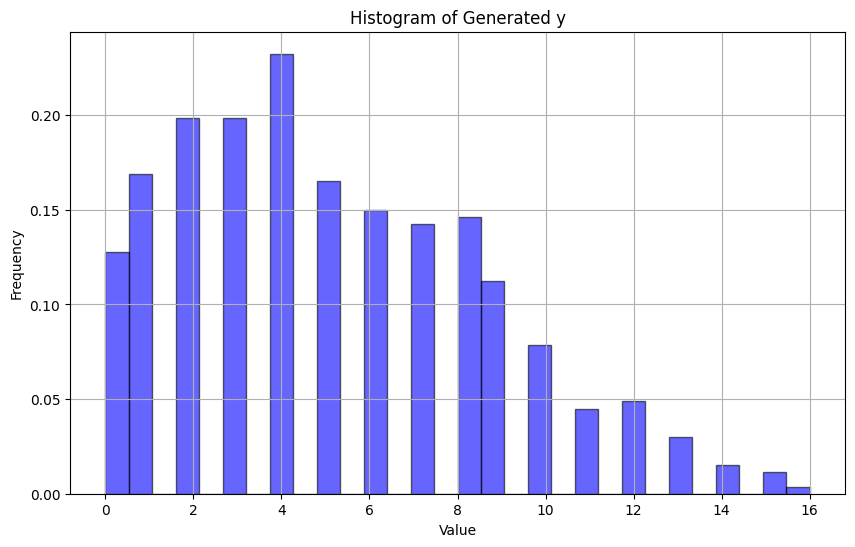

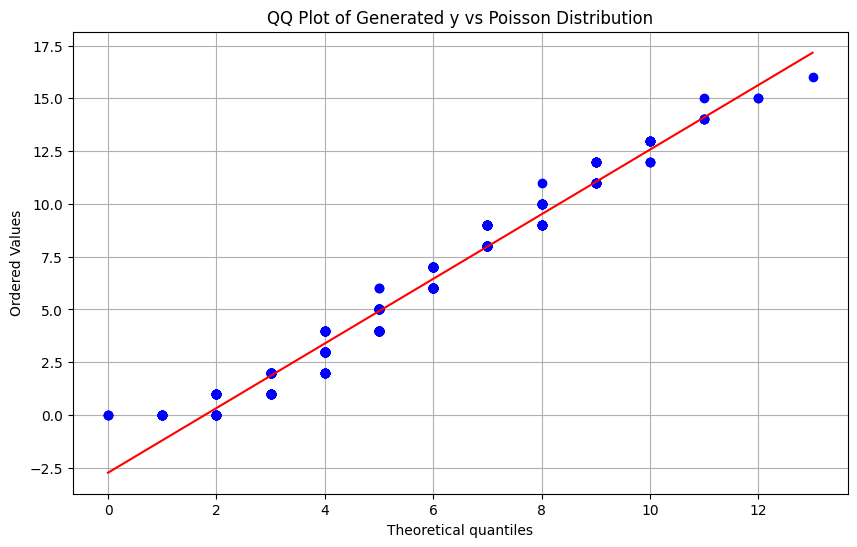

Chi-squared test statistic: 745.0739542927383
p-value: 3.2599964902030376e-148
The generated y does not follow a Poisson distribution (reject H0).


In [15]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import chisquare

# 定义核心集合和系数
core_itemset = np.array([np.array([3, 14, 33]), np.array([2, 22, 28, 37]), np.array([7, 35]), np.array([10, 25, 29, 31, 20])], dtype=object)
core_coefficent = np.random.randint(1, 8, len(core_itemset))  # 核心集合的系数范围1到8
core_itemset_dict = {
    "set1": core_itemset[0],
    "set2": core_itemset[1],
    "set3": core_itemset[2],
    "set4": core_itemset[3]
}

print("Core coefficients:", core_coefficent)

# 创建稀疏矩阵
num_rows = 500  # 示例行数
num_cols = 40  # 示例列数
sparse_matrix = np.zeros((num_rows, num_cols), dtype=int)

# 生成所有可能的子集
all_keys = list(core_itemset_dict.keys())
all_subsets = [subset for r in range(1, len(all_keys) + 1) for subset in itertools.combinations(all_keys, r)]

# 为每行随机分配一个子集，并设置相应列为1
chosen_subsets_per_row = []
for i in range(num_rows):
    chosen_subset = all_subsets[np.random.randint(0, len(all_subsets))]
    chosen_subsets_per_row.append(chosen_subset)
    for key in chosen_subset:
        for element in core_itemset_dict[key]:
            sparse_matrix[i, element - 1] = 1

# 随机填充一些其他的1，使矩阵保持稀疏性
sparsity = 0.1  # 定义稀疏度，比如 10%
num_elements_to_fill = int(sparsity * num_rows * num_cols)
while num_elements_to_fill > 0:
    row, col = np.random.randint(0, num_rows), np.random.randint(0, num_cols)
    if sparse_matrix[row, col] == 0:
        sparse_matrix[row, col] = 1
        num_elements_to_fill -= 1

print("\nSparse Matrix:")
print(sparse_matrix)

# 检查每行是否包含选择的子集中的所有元素
def check_matrix(matrix, chosen_subsets, core_itemset_dict):
    for i, subset in enumerate(chosen_subsets):
        for key in subset:
            for element in core_itemset_dict[key]:
                if matrix[i, element - 1] != 1:
                    print(f"Error in row {i}: element {element} from subset {key} is not set to 1")
                    return False
    return True

if check_matrix(sparse_matrix, chosen_subsets_per_row, core_itemset_dict):
    print("\nAll chosen subsets are correctly represented in the matrix.")
else:
    print("\nThere was an error in the matrix representation.")

# 生成泊松分布的响应变量 y
lambda_vector = np.zeros(num_rows)
for i, subset in enumerate(chosen_subsets_per_row):
    for key in subset:
        key_index = all_keys.index(key)
        lambda_vector[i] += core_coefficent[key_index]

# 确保 lambda_vector 的最小值不为零
lambda_vector = np.maximum(lambda_vector, 1)

# 调整 lambda_vector 的分布，使其更接近泊松分布的期望
mean_lambda = np.mean(lambda_vector)
lambda_vector = (lambda_vector / mean_lambda) * 5  # 调整均值为 5

y = np.random.poisson(lambda_vector)

print("\nGenerated y vector:")
print(y)

# 检查 lambda_vector 的统计信息
print("\nLambda vector statistics:")
print(f"Mean: {np.mean(lambda_vector)}, Std Dev: {np.std(lambda_vector)}, Min: {np.min(lambda_vector)}, Max: {np.max(lambda_vector)}")

# 检查 y 的统计信息
print("\nGenerated y vector statistics:")
print(f"Mean: {np.mean(y)}, Std Dev: {np.std(y)}, Min: {np.min(y)}, Max: {np.max(y)}")

# 1. 绘制直方图
plt.figure(figsize=(10, 6))
plt.hist(y, bins=30, density=True, alpha=0.6, color='b', edgecolor='black')
plt.title('Histogram of Generated y')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# 2. 绘制QQ图
plt.figure(figsize=(10, 6))
stats.probplot(y, dist="poisson", sparams=(np.mean(y),), plot=plt)
plt.title('QQ Plot of Generated y vs Poisson Distribution')
plt.grid(True)
plt.show()

# 3. 卡方检验
# 确保观察频率和预期频率的总和相等
observed_freq = np.bincount(y)
expected_freq = [len(y) * stats.poisson.pmf(i, np.mean(y)) for i in range(len(observed_freq))]

# 确保 expected_freq 和 observed_freq 的长度一致
max_length = max(len(observed_freq), len(expected_freq))
observed_freq = np.pad(observed_freq, (0, max_length - len(observed_freq)), 'constant')
expected_freq = np.pad(expected_freq, (0, max_length - len(expected_freq)), 'constant')

# 调整预期频率的总和以匹配观察频率的总和
expected_freq = expected_freq * (np.sum(observed_freq) / np.sum(expected_freq))

# 进行卡方检验
chi2_stat, p_val = chisquare(observed_freq, f_exp=expected_freq)

print(f"Chi-squared test statistic: {chi2_stat}")
print(f"p-value: {p_val}")

if p_val > 0.05:
    print("The generated y follows a Poisson distribution (fail to reject H0).")
else:
    print("The generated y does not follow a Poisson distribution (reject H0).")



Generated y vector:
[  2   7   6  10   6   0  70   3   3  14   5 108  74   3  15   3   9   8
   3   2   9   2   1   8   2  21   2  20   3   8   9   1   1   9   6   6
  26   3   2   2  14   9  49   3   0  25   8   4   1   7   4   6   2   3
   4  20   2   5  17   2  13   3  34   0   4  13   2   2   8  12  47   5
   6   5   4   3   9   5   2  15   1   1   6   7   6   6   3  14   5   2
   3   1  28   7   2  19   3  17  17   3   5   3   3   7   2   1   6   3
  12   1  34  12   0   4   4  12   1   4   7   0  10  49   8  11  15   8
   3   4   9  18   3  30  27  37   0   4   0   4   2  32   0   2  11   2
  35   4   1  14   6  19   4   8  14   3   5   1   8   3  17   4   7  27
   9   1   9   3   2   1  33  18  24  17   1   2   6   1   4   3  14  13
  10   1  36   5   2   4   2   0   5  28   9   1   9  10   2   8   4   2
   6   6   1   9  27  14   6   2  11   1   3   3   1   5 112   2   3  12
   1   1   3   9  10  10   0   0   0   0   9  13   5  28  42   1   6   5
   2   2  10   5   1   1  12  

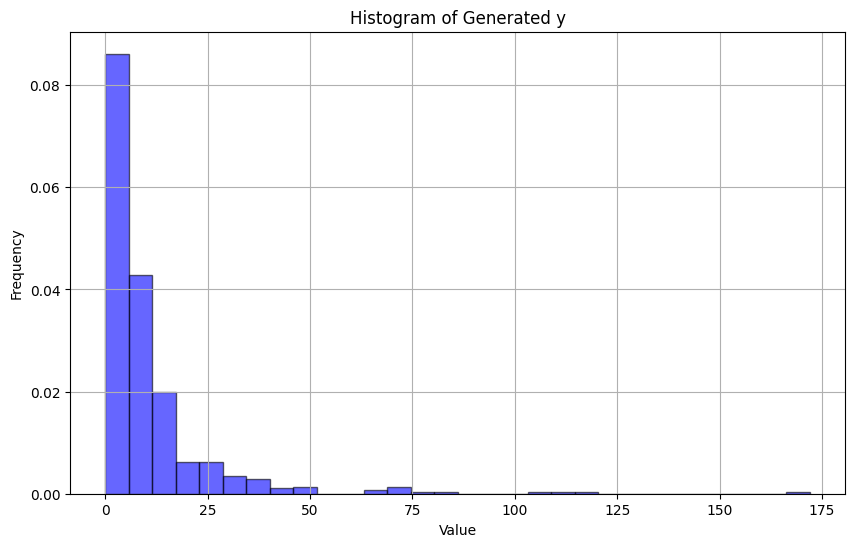

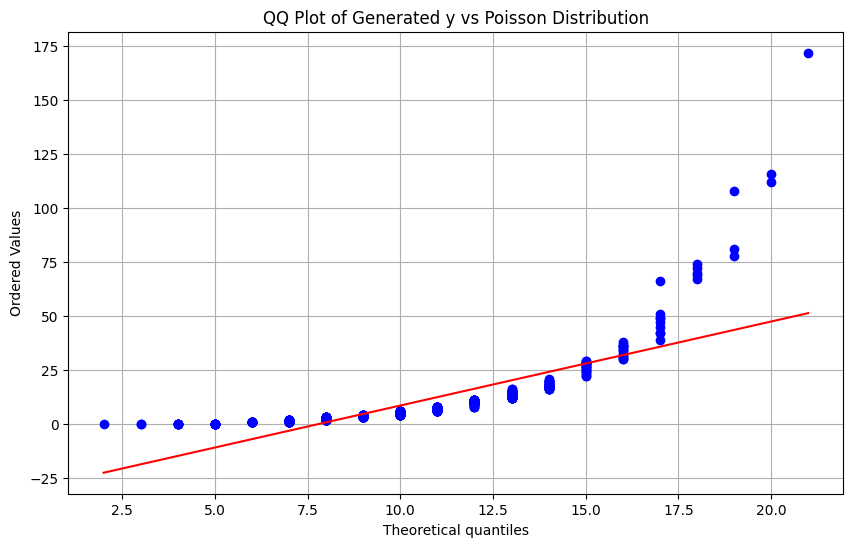

Chi-squared test statistic: 2.286115324419691e+137
p-value: 0.0
The generated y does not follow a Poisson distribution (reject H0).


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from scipy.stats import poisson

# 生成示例数据
np.random.seed(42)
n_samples = 365  # 假设一年有365天
weather = np.random.choice(['sunny', 'rainy', 'snowy'], n_samples, p=[0.7, 0.2, 0.1])
traffic_flow = np.random.normal(100, 10, n_samples)
accidents = np.random.poisson(lam=(traffic_flow / 10))

# 创建数据框
data = pd.DataFrame({
    'weather': weather,
    'traffic_flow': traffic_flow,
    'accidents': accidents
})

# 将类别变量转换为虚拟变量
data = pd.get_dummies(data, columns=['weather'], drop_first=True)

# 检查数据
print(data.head())

# 打印列名以检查虚拟变量
print(data.columns)

# 拟合泊松回归模型
# 确保公式中的列名与虚拟变量的列名一致
formula = 'accidents ~ traffic_flow + weather_rainy + weather_snowy'
poisson_model = smf.poisson(formula, data=data).fit()

# 显示模型摘要
print(poisson_model.summary())

# 预测值
data['accidents_pred'] = poisson_model.predict(data)

# 计算观测值的频率
observed_counts = np.bincount(data['accidents'])
observed = pd.Series(observed_counts, index=np.arange(len(observed_counts)))

# 计算拟合的泊松概率和频率
lambda_fit = np.mean(data['accidents_pred'])
fitted_probs = poisson.pmf(np.arange(len(observed_counts)), lambda_fit)
fitted = fitted_probs * len(data)

# 准备绘图数据
plot_data = pd.DataFrame({
    'value': np.arange(len(observed)),
    'observed': observed,
    'fitted': fitted
})

# 使用 Matplotlib 进行绘图
plt.figure(figsize=(10, 6))
plt.bar(plot_data['value'] - 0.2, plot_data['observed'], width=0.4, label='Observed', color='blue', alpha=0.6)
plt.bar(plot_data['value'] + 0.2, plot_data['fitted'], width=0.4, label='Fitted', color='red', alpha=0.6)
plt.title('Observed vs Fitted Poisson Distribution')
plt.xlabel('Number of Accidents')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()



   traffic_flow  accidents  weather_snowy  weather_sunny
0    104.393271         11          False           True
1     98.915021          8           True          False
2     95.135672         11          False          False
3    102.075983         12          False           True
4    108.849905         13          False           True
Index(['traffic_flow', 'accidents', 'weather_snowy', 'weather_sunny'], dtype='object')


PatsyError: Error evaluating factor: NameError: name 'weather_rainy' is not defined
    accidents ~ traffic_flow + weather_rainy + weather_snowy
                               ^^^^^^^^^^^^^